In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline

### Ouverture du dataset et exploration

In [3]:
df = pd.read_csv("hubble_data.csv")

In [4]:
df.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [5]:
df.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
distance              24 non-null float64
recession_velocity    24 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Affichage

Seaborn permet d'avoir directement la regression linéaire d'afficher mais on va la recalculer ensuite

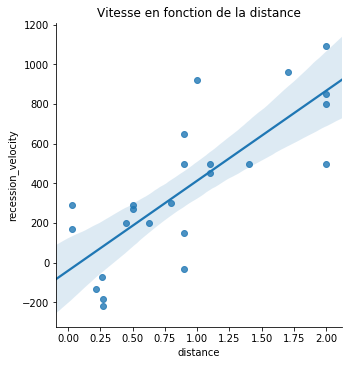

In [8]:
sns.lmplot(x="distance", y="recession_velocity" , data=df)
plt.title("Vitesse en fonction de la distance")
plt.show()

### Regression

Deja on prépare la donnée

In [13]:
X = df["distance"].as_matrix().reshape(-1,1)
Y = df["recession_velocity"].as_matrix().reshape(-1,1)

On peut créer et fitter le modèle

In [14]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Une fois fitté, on peut récup le paramètre de la regression y = ax + b

In [36]:
print(model.coef_[0][0])
print(model.intercept_[0])

454.158440923
-40.7836490959


Pour la modélisation, en réalité 2 pts suffisent mais ce n'est pas toujours le cas donc on va générer plus de pts (dans ce cas, 10)

In [37]:
def f(x, a, b):
    return a*x+b

x = np.linspace (start = 0, stop = 2, num=10)
y = f(x, a=model.coef_[0][0] , b=model.intercept_[0])

on peu mainteant afficher la regression sur le modèle sans afficher celle de seaborn (qui est superposée)

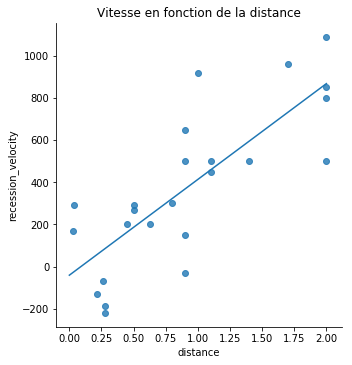

In [39]:
sns.lmplot(x="distance", y="recession_velocity" , data=df, fit_reg=False)
plt.plot(x, y)
plt.title("Vitesse en fonction de la distance")
plt.show()